In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import visuals as vs
from datetime import timedelta
%matplotlib inline

In [2]:
transaction = pd.read_csv('transactions_sampled.csv', 
    names = ['id', 'chain', 'dept','category','company','brand','date',
        'productsize','productmeasure','purchasequantity','purchaseamount'])

In [3]:
transaction['date'] = transaction['date'].apply(lambda x: pd.to_datetime(x))

In [4]:
transaction.loc[transaction[transaction['productmeasure'] == '1'].index, 'productmeasure'] = 'OZ'

In [5]:
transaction['productmeasure'].fillna('Unknown',inplace = True)

In [6]:
transaction['price'] = transaction.apply(lambda x: x.purchaseamount/x.purchasequantity if (x.purchaseamount > 0 and x.purchasequantity > 0) else 0, axis = 1)

In [7]:
transaction['year'] = transaction['date'].dt.year
transaction['month'] = transaction['date'].dt.month

In [8]:
transaction['dateblock'] = transaction.apply(lambda x: "lag_{}".format(2020-(x.year+x.month)) if x.year == 2013 else "lag_{}".format(2031-(x.year + x.month)), axis = 1)

In [9]:
date_block_deserted = ['lag_0','lag_1','lag_2','lag_3']

In [10]:
data = transaction[~transaction['dateblock'].isin(date_block_deserted)]

In [11]:
data.shape

(450252, 15)

In [12]:
sum(data['purchasequantity'])

725243

In [13]:
data.groupby(['category']).purchasequantity.sum()[:100].sort_values(ascending = False).index

Int64Index([907,   0, 501, 902, 901, 416, 418, 908, 810, 106, 516, 818, 504,
            707, 502, 410, 814, 801, 610, 201, 912, 302, 419, 708, 519, 709,
            811, 202, 517, 807, 421, 411, 809, 803, 417, 311, 805, 817, 310,
            904, 905, 903, 836, 405, 427, 826, 607, 214, 407, 213, 706, 520,
            105, 601, 412, 518, 838, 835, 821, 305, 103, 822, 816, 304, 212,
            910, 906, 605, 423, 702, 830, 303, 911, 802, 211, 104, 703, 308,
            815, 603, 608, 606, 415, 808, 422, 309, 837, 521, 829, 307, 522,
            208, 609, 210, 399, 209, 799, 510, 203, 207],
           dtype='int64', name=u'category')

In [14]:
top_50_category = [  0, 501, 416, 418, 106, 516, 504, 502, 410, 201, 302, 419, 519,
            202, 517, 421, 411, 311, 417, 310, 405, 427, 214, 407, 213, 520,
            105, 412, 518, 305, 103, 304, 212, 423, 303, 211, 104, 308, 415,
            422, 309, 521, 307, 208, 210, 399, 209, 510, 203, 207]

In [15]:
top_100_category = [907,   0, 501, 902, 901, 416, 418, 908, 810, 106, 516, 818, 504,
            707, 502, 410, 814, 801, 610, 201, 912, 302, 419, 708, 519, 709,
            811, 202, 517, 807, 421, 411, 809, 803, 417, 311, 805, 817, 310,
            904, 905, 903, 836, 405, 427, 826, 607, 214, 407, 213, 706, 520,
            105, 601, 412, 518, 838, 835, 821, 305, 103, 822, 816, 304, 212,
            910, 906, 605, 423, 702, 830, 303, 911, 802, 211, 104, 703, 308,
            815, 603, 608, 606, 415, 808, 422, 309, 837, 521, 829, 307, 522,
            208, 609, 210, 399, 209, 799, 510, 203, 207]

In [16]:
data_top_50 = data[data['category'].isin(top_50_category)]

In [17]:
data_top_100 = data[data['category'].isin(top_100_category)]

In [18]:
sum(data_top_50['purchasequantity'])

63713

In [19]:
sum(data_top_100['purchasequantity'])

134083

### We consider the top 50 categories of products for our customer segmentation

In [20]:
data_top_50.reset_index(drop = True, inplace = True)

In [21]:
data_top_50.head()

,id,chain,dept,category,company,brand,date,productsize,productmeasure,purchasequantity,purchaseamount,price,year,month,dateblock
0,4235139153,214,4,410,101420010,3294,2012-10-02,1.12,OZ,11,3.63,0.33,2012,10,lag_9
1,722672120,133,0,0,10000,0,2013-02-28,0.00,Unknown,1,0.00,0.00,2013,2,lag_5
2,2308480936,85,4,416,103400030,8247,2012-08-23,3.92,OZ,5,6.65,1.33,2012,8,lag_11
3,604275893,2,0,0,10000,0,2012-09-14,0.00,Unknown,1,0.00,0.00,2012,9,lag_10
4,602926476,96,0,0,10000,0,2012-05-24,0.00,Unknown,1,0.00,0.00,2012,5,lag_14


In [22]:
customer_cate = data_top_50.pivot_table(index = ['id'],
                                       columns = 'category',
                                       values = 'purchasequantity',
                                       aggfunc = 'sum').fillna(0).reset_index()

In [23]:
customer_cate.head()

category,id,0,103,104,105,106,201,202,203,207,...,501,502,504,510,516,517,518,519,520,521
0,86246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,86252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,13089312,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,16412251,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17041984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
customer_feature = customer_cate.iloc[:,1:]

In [25]:
from IPython.display import display
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

### Consider categories to be six components.

In [26]:
pca = PCA(n_components = 6)
pca.fit(customer_feature)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

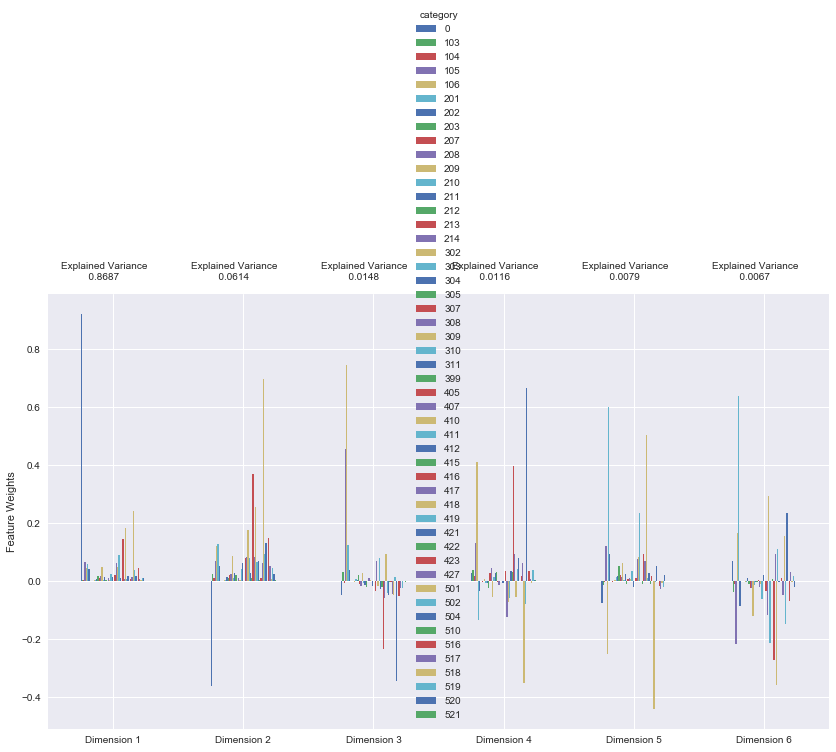

In [27]:
pca_results = vs.pca_results(customer_feature, pca)

In [28]:
print sum(pca.explained_variance_ratio_[0:2])
print sum(pca.explained_variance_ratio_[0:4])

0.930031377416
0.95646982851


In [29]:
pca_data = pca.transform(customer_feature)

In [30]:
pca_data = pd.DataFrame(pca_data, columns = pca_results.index.values)
pca_data.head()

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-0.261831,0.439346,-0.051814,-0.370565,-0.365138,0.113079
1,-0.261831,0.439346,-0.051814,-0.370565,-0.365138,0.113079
2,-0.490465,-0.195898,-0.046295,0.042166,0.078471,-0.090992
3,0.418553,-0.621756,-0.050676,0.007027,-0.000800,0.027521
4,-0.381470,0.159803,-0.125121,0.148281,0.402220,-0.008287


In [31]:
display(pd.DataFrame(np.round(pca_data, 4), columns = pca_results.index.values)).head()

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-0.2618,0.4393,-0.0518,-0.3706,-0.3651,0.1131
1,-0.2618,0.4393,-0.0518,-0.3706,-0.3651,0.1131
2,-0.4905,-0.1959,-0.0463,0.0422,0.0785,-0.0910
3,0.4186,-0.6218,-0.0507,0.0070,-0.0008,0.0275
4,-0.3815,0.1598,-0.1251,0.1483,0.4022,-0.0083
5,-0.0194,1.1364,-0.1016,-0.7216,-0.8069,0.2684
6,-0.3238,0.2316,2.9817,1.6193,-0.9350,0.6221
7,-0.3273,-0.0997,0.1603,-0.1348,0.5475,-0.4685
8,-0.5030,-0.2546,-0.0045,-0.0161,0.0766,-0.0434
9,-0.4883,-0.2322,-0.0203,0.0267,0.0918,-0.0659


AttributeError: 'NoneType' object has no attribute 'head'

In [32]:
def produceKMeans(k):
    global clusterer, preds, centers
    clusterer = KMeans(n_clusters = k, random_state = 0)
    clusterer.fit(pca_data)
    preds = clusterer.predict(pca_data)
    centers = clusterer.cluster_centers_
    score = silhouette_score(pca_data,preds)
    return score

In [33]:
#results = pd.DataFrame(columns = ['Silhouette Score'])
#results.columns.name = 'Number of Clusters'
#for k in range(2, 10):
 #   score = produceKMeans(k)
  #  results = results.append(pd.DataFrame([score], columns=['Silouette Score'], index=[k]))
#display(results)

In [34]:
produceKMeans(3)

0.99486986598962546

In [35]:
true_centers = pca.inverse_transform(centers)

In [36]:
## display the true centers
segments = ['Segment {}'.format(i) for i in range(len(centers))]
centers = pd.DataFrame(np.round(true_centers), columns = customer_feature.columns)
centers.index = segments
display(centers)

category,0,103,104,105,106,201,202,203,207,208,...,501,502,504,510,516,517,518,519,520,521
Segment 0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Segment 1,1332.0,9.0,4.0,123.0,75.0,108.0,75.0,-0.0,0.0,-0.0,...,385.0,68.0,-1.0,-0.0,72.0,11.0,7.0,14.0,20.0,2.0
Segment 2,275.0,0.0,1.0,-2.0,5.0,1.0,4.0,-0.0,-0.0,-0.0,...,42.0,1.0,33.0,-0.0,8.0,2.0,1.0,3.0,1.0,0.0


In [37]:
centers.iloc[0]

category
0      0.0
103    0.0
104    0.0
105    0.0
106    0.0
201    0.0
202    0.0
203    0.0
207    0.0
208    0.0
209    0.0
210    0.0
211    0.0
212    0.0
213    0.0
214    0.0
302    0.0
303    0.0
304    0.0
305    0.0
307    0.0
308    0.0
309    0.0
310    0.0
311    0.0
399    0.0
405    0.0
407    0.0
410    0.0
411    0.0
412    0.0
415    0.0
416    0.0
417    0.0
418    0.0
419    0.0
421    0.0
422    0.0
423    0.0
427    0.0
501    0.0
502    0.0
504    0.0
510    0.0
516    0.0
517    0.0
518    0.0
519    0.0
520    0.0
521    0.0
Name: Segment 0, dtype: float64

In [38]:
centers.iloc[1]

category
0      1332.0
103       9.0
104       4.0
105     123.0
106      75.0
201     108.0
202      75.0
203      -0.0
207       0.0
208      -0.0
209       3.0
210       7.0
211      12.0
212      32.0
213      19.0
214      25.0
302      86.0
303       8.0
304      21.0
305       6.0
307       2.0
308      19.0
309       6.0
310      40.0
311      22.0
399       0.0
405      36.0
407     109.0
410      78.0
411     154.0
412      17.0
415       0.0
416     228.0
417      12.0
418     318.0
419       8.0
421      27.0
422       0.0
423       9.0
427      23.0
501     385.0
502      68.0
504      -1.0
510      -0.0
516      72.0
517      11.0
518       7.0
519      14.0
520      20.0
521       2.0
Name: Segment 1, dtype: float64

In [39]:
centers.iloc[2]

category
0      275.0
103      0.0
104      1.0
105     -2.0
106      5.0
201      1.0
202      4.0
203     -0.0
207     -0.0
208     -0.0
209      1.0
210      0.0
211      1.0
212      2.0
213      3.0
214      4.0
302      4.0
303      1.0
304      3.0
305      2.0
307      0.0
308      1.0
309      0.0
310      3.0
311      2.0
399      0.0
405      4.0
407      4.0
410      8.0
411      7.0
412      4.0
415      2.0
416     36.0
417      3.0
418     16.0
419      3.0
421      5.0
422      0.0
423      1.0
427      3.0
501     42.0
502      1.0
504     33.0
510     -0.0
516      8.0
517      2.0
518      1.0
519      3.0
520      1.0
521      0.0
Name: Segment 2, dtype: float64

In [40]:
display(customer_feature.describe())

category,0,103,104,105,106,201,202,203,207,208,...,501,502,504,510,516,517,518,519,520,521
count,33106.000000,33106.000000,33106.000000,33106.000000,33106.000000,33106.000000,33106.000000,33106.000000,33106.000000,33106.00000,...,33106.000000,33106.000000,33106.000000,33106.000000,33106.000000,33106.000000,33106.000000,33106.000000,33106.000000,33106.000000
mean,0.381260,0.010210,0.005256,0.014650,0.100405,0.042349,0.030720,0.000332,0.000242,0.00151,...,0.335075,0.054008,0.067571,0.000362,0.098925,0.029723,0.012898,0.033317,0.014650,0.002235
std,8.456039,0.211621,0.124251,0.987949,1.163720,1.005207,0.488495,0.025184,0.015543,0.04789,...,2.840704,0.778107,0.990147,0.019036,0.724671,0.271306,0.157527,0.281443,0.194773,0.052092
min,-33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1331.000000,24.000000,11.000000,131.000000,97.000000,141.000000,77.000000,3.000000,1.000000,4.00000,...,388.000000,100.000000,138.000000,1.000000,70.000000,20.000000,10.000000,15.000000,20.000000,2.000000


In [42]:
print 'True Centers offset from mean of dataset:'
display (centers - np.round(customer_feature.mean(), 4))

print 'True Centers offset from median of dataset:'
display (centers - np.round(customer_feature.median(), 4))

True Centers offset from mean of dataset:


category,0,103,104,105,106,201,202,203,207,208,...,501,502,504,510,516,517,518,519,520,521
Segment 0,-0.3813,-0.0102,-0.0053,-0.0146,-0.1004,-0.0423,-0.0307,-0.0003,-0.0002,-0.0015,...,-0.3351,-0.054,-0.0676,-0.0004,-0.0989,-0.0297,-0.0129,-0.0333,-0.0146,-0.0022
Segment 1,1331.6187,8.9898,3.9947,122.9854,74.8996,107.9577,74.9693,-0.0003,-0.0002,-0.0015,...,384.6649,67.946,-1.0676,-0.0004,71.9011,10.9703,6.9871,13.9667,19.9854,1.9978
Segment 2,274.6187,-0.0102,0.9947,-2.0146,4.8996,0.9577,3.9693,-0.0003,-0.0002,-0.0015,...,41.6649,0.946,32.9324,-0.0004,7.9011,1.9703,0.9871,2.9667,0.9854,-0.0022


True Centers offset from median of dataset:


category,0,103,104,105,106,201,202,203,207,208,...,501,502,504,510,516,517,518,519,520,521
Segment 0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Segment 1,1332.0,9.0,4.0,123.0,75.0,108.0,75.0,-0.0,0.0,-0.0,...,385.0,68.0,-1.0,-0.0,72.0,11.0,7.0,14.0,20.0,2.0
Segment 2,275.0,0.0,1.0,-2.0,5.0,1.0,4.0,-0.0,-0.0,-0.0,...,42.0,1.0,33.0,-0.0,8.0,2.0,1.0,3.0,1.0,0.0
